In [7]:
%matplotlib inline
import sys
sys.path.append("..")


from skimage import io
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import defaultdict

from bsplines.spline_helpers import make_spline
from python.smlmlib.bspline import BSpline

In [8]:
INPUT_MOVIE = r'C:\Users\Willem Melching\Dropbox\Thesis\data\z-stack-Beads-AS-Exp-as-stack\sequence-as-stack-Beads-AS-Exp.tif'

POSITIONS = np.array(
    [(25.05051088,20.37593071),
     (93.43403236,28.25086383),
     (43.50957276,71.04008986),
     (28.84621702,119.5179242),
     (90.83092481,111.3964048),
     (122.6776528,62.16889649)]);
movie = io.imread(INPUT_MOVIE)

In [9]:
def generate_image(smlm, spline, z_index):
    z_range = np.linspace(-0.75, 0.75, num=151)
    z = z_range[z_index]
    img = np.zeros((31, 31))
    for x in range(1, 32):
        for y in range(1, 32):
            img[y-1][x-1] = smlm.BSpline_EvalSpline(spline, x, y, z)
    return img

In [10]:
def get_img_from_movie(z_index):
    x = int(POSITIONS[0, 0])
    y = int(POSITIONS[0, 1])
    ROI = 15

    img = movie[z_index, y-ROI:y+ROI+1, x-ROI:x+ROI+1]
    return img

342121


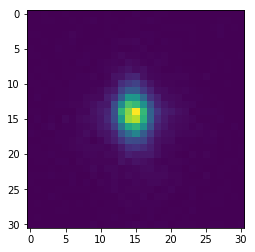

In [11]:
img = get_img_from_movie(75)
plt.imshow(img)
print(np.sum(img))

Using C:\Users\Willem Melching\Development\smlm\x64\Release\smlm_cuda.dll


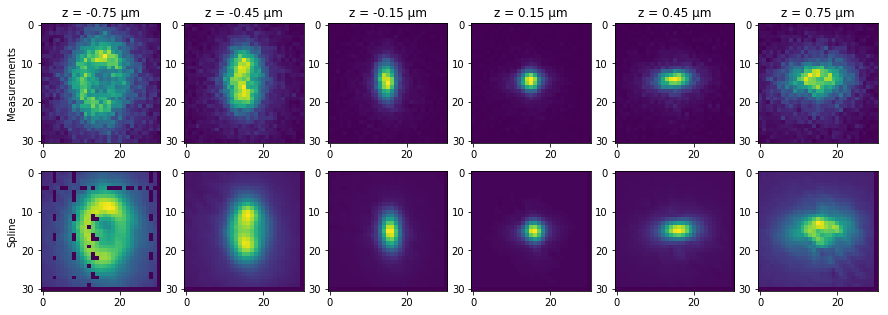

In [12]:
with BSpline(debugMode=False) as smlm:
    spline, data = make_spline(smlm)
    
    zs = list(range(0, 151, 30))
    f = plt.figure(figsize=(15, 5))
    for i, z_index in enumerate(zs):
        z_range = np.linspace(-0.75, 0.75, num=151)

        plt.subplot(2, len(zs), i+1)
        plt.title(f'z = {z_range[z_index]:.2f} µm')
        plt.imshow(get_img_from_movie(z_index))
        if i == 0:
            plt.ylabel('Measurements')
        
        plt.subplot(2, len(zs), i+1+len(zs))
        plt.imshow(generate_image(smlm, spline, z_index))
        if i == 0:
            plt.ylabel('Spline')
        
        
#     f.savefig("./plots/spline_vs_meas.pdf", bbox_inches='tight')